In [1]:
import numpy as np
import csv

import os, sys
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, MaxPooling2D, Input, Activation
from keras.callbacks import TensorBoard
from keras.layers.core import Reshape
from keras import backend as K
from keras import optimizers
import keras.constraints as constraints
from keras.utils import np_utils, to_categorical
from sklearn.utils import shuffle
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from numpy import array


from keras.layers import Input, Dense
from keras.layers.advanced_activations import  LeakyReLU
from keras.models import Model
import keras.initializers as init

os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
config = tf.ConfigProto( )
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import keras.backend.tensorflow_backend as tf_bkend
tf_bkend.set_session(sess)

/home/an80020/anaconda2/envs/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#from keras.datasets import mnist
#from scipy.misc import imresize
#x_mnist=[]
#y_mnist=[]

#(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

#for i in range(60000):
#    x_mnist.append((imresize(x_train_mnist[i], size=(64, 64), interp='nearest')).flatten())  
#    y_mnist.append(y_train_mnist[i].flatten())

In [5]:
reader_feature = csv.reader(open('train_x.csv'))
reader_target = csv.reader(open('train_y.csv'))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

i=0
train_feat=[]

print len(train_feat)

for row in reader_feature:
    tmp=np.asarray(row)
    tmp=tmp.astype('float32')
    tmp=tmp.reshape(64, 64)
    #S=undesired_objects (tmp)
    tmp[tmp < 240] = 0   
    train_feat.append(tmp.flatten()) 
    i=i+1
print len(train_feat)

0
50000


In [5]:
i=0
train_target=[]

for row in reader_target:
    train_target.append(row)
    i=i+1
print i

50000


In [6]:
nb_classes=10
batch_size=128
nb_epoch=10000

In [7]:
train_feat=np.asarray(train_feat)
train_target=np.asarray(train_target)


In [8]:
X_train=train_feat.astype('float32')

In [9]:
print X_train.shape

(50000, 4096)


In [10]:
data,label=shuffle(X_train,train_target,random_state=0)
train_data=[data,label]
(X,Y)=(train_data[0],train_data[1])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
X_train= X_train.reshape(-1, 64, 64, 1)
Y_train=to_categorical(Y_train, num_classes=nb_classes)

X_valid= X_valid.reshape(-1, 64, 64, 1)
Y_valid=to_categorical(Y_valid, num_classes=nb_classes)

In [13]:
def model_generator(): 
    ########################################5 LAYERS####################
    from keras.layers import Input, Dense
    from keras.models import Model
    from keras.callbacks import ModelCheckpoint

    inp =  Input(shape=(64, 64, 1))

    #----------------------
    conv1 = Conv2D(filters=64, kernel_size=(3, 3) ,strides=(2, 2), activation='relu')(inp)

    norm1=BatchNormalization()(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(norm1)
    #----------------------

    conv2 = Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu')(pool1)

    norm2=BatchNormalization()(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(norm2)
    
    #----------------------

    conv3 = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu')(pool2)

    norm3=BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(norm3)
    
    #----------------------

    conv4 = Conv2D(filters=16, kernel_size=(3,3), strides=(2, 2), activation='relu')(pool3)

    norm4=BatchNormalization()(conv4)

    pool4= MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(norm4)

       

    flat = Flatten()(pool4)
    dense1 = Dense(256,activation='relu')(flat)
    dense2 = Dense(128,activation='relu')(dense1)
    dense3 = Dense(64,activation='relu')(dense2)
    dense4 = Dense(10,activation='softmax')(dense3)
    model = Model(inp, dense4)

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.01, decay=1e-6, amsgrad=False)
              ,metrics=['accuracy'])

    return model

In [15]:
from keras.preprocessing.image import ImageDataGenerator
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#y_train = np_utils.to_categorical(y_train, num_classes)
#y_test = np_utils.to_categorical(y_test, num_classes)

model=model_generator()
print model.summary()

#checkpoints 
str1="weights.best4.hdf5" 
filepath=str1
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
callbacks_list = [checkpoint]

model.fit(X_train, Y_train, verbose=1,callbacks=callbacks_list,epochs=nb_epoch,
                  validation_data=(X_valid,Y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
__________

Epoch 20/10000
39872/40000 [============================>.] - ETA: 0s - loss: 0.2781 - acc: 0.9184
Epoch 00020: val_acc did not improve
40000/40000 [==============================] - 9s 216us/step - loss: 0.2781 - acc: 0.9184 - val_loss: 0.5083 - val_acc: 0.8654
Epoch 21/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.2788 - acc: 0.9183
Epoch 00021: val_acc did not improve
40000/40000 [==============================] - 8s 205us/step - loss: 0.2788 - acc: 0.9183 - val_loss: 0.4863 - val_acc: 0.8660
Epoch 22/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.2699 - acc: 0.9224
Epoch 00022: val_acc did not improve
40000/40000 [==============================] - 8s 208us/step - loss: 0.2699 - acc: 0.9225 - val_loss: 0.5068 - val_acc: 0.8667
Epoch 23/10000
39712/40000 [============================>.] - ETA: 0s - loss: 0.2687 - acc: 0.9208
Epoch 00023: val_acc did not improve
40000/40000 [==============================] - 8s 210us/step - loss: 0.2685

Epoch 51/10000
39808/40000 [============================>.] - ETA: 0s - loss: 0.1725 - acc: 0.9520
Epoch 00051: val_acc did not improve
40000/40000 [==============================] - 8s 205us/step - loss: 0.1734 - acc: 0.9518 - val_loss: 0.5967 - val_acc: 0.8691
Epoch 52/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.1674 - acc: 0.9526
Epoch 00052: val_acc improved from 0.87590 to 0.87860, saving model to weights.best4.hdf5
40000/40000 [==============================] - 8s 205us/step - loss: 0.1673 - acc: 0.9526 - val_loss: 0.5703 - val_acc: 0.8786
Epoch 53/10000
39904/40000 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9531
Epoch 00053: val_acc did not improve
40000/40000 [==============================] - 8s 212us/step - loss: 0.1633 - acc: 0.9530 - val_loss: 0.5826 - val_acc: 0.8655
Epoch 54/10000
39904/40000 [============================>.] - ETA: 0s - loss: 0.1670 - acc: 0.9528
Epoch 00054: val_acc did not improve
40000/40000 [=========

Epoch 82/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.1334 - acc: 0.9641
Epoch 00082: val_acc did not improve
40000/40000 [==============================] - 8s 210us/step - loss: 0.1333 - acc: 0.9641 - val_loss: 0.6995 - val_acc: 0.8645
Epoch 83/10000
39808/40000 [============================>.] - ETA: 0s - loss: 0.1210 - acc: 0.9672
Epoch 00083: val_acc did not improve
40000/40000 [==============================] - 8s 209us/step - loss: 0.1215 - acc: 0.9671 - val_loss: 0.6440 - val_acc: 0.8735
Epoch 84/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.1159 - acc: 0.9688
Epoch 00084: val_acc did not improve
40000/40000 [==============================] - 9s 217us/step - loss: 0.1160 - acc: 0.9688 - val_loss: 0.6146 - val_acc: 0.8745
Epoch 85/10000
39744/40000 [============================>.] - ETA: 0s - loss: 0.1395 - acc: 0.9632
Epoch 00085: val_acc did not improve
40000/40000 [==============================] - 8s 209us/step - loss: 0.1389

39936/40000 [============================>.] - ETA: 0s - loss: 0.1104 - acc: 0.9715
Epoch 00113: val_acc did not improve
40000/40000 [==============================] - 11s 279us/step - loss: 0.1104 - acc: 0.9715 - val_loss: 0.7131 - val_acc: 0.8728
Epoch 114/10000
39744/40000 [============================>.] - ETA: 0s - loss: 0.0981 - acc: 0.9741
Epoch 00114: val_acc did not improve
40000/40000 [==============================] - 9s 213us/step - loss: 0.0982 - acc: 0.9740 - val_loss: 0.7132 - val_acc: 0.8706
Epoch 115/10000
39936/40000 [============================>.] - ETA: 0s - loss: 0.1256 - acc: 0.9686
Epoch 00115: val_acc did not improve
40000/40000 [==============================] - 11s 281us/step - loss: 0.1261 - acc: 0.9685 - val_loss: 0.7443 - val_acc: 0.8696
Epoch 116/10000
39872/40000 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9708
Epoch 00116: val_acc did not improve
40000/40000 [==============================] - 9s 220us/step - loss: 0.1093 - acc: 0.

39968/40000 [============================>.] - ETA: 0s - loss: 0.0900 - acc: 0.9762
Epoch 00144: val_acc did not improve
40000/40000 [==============================] - 10s 243us/step - loss: 0.0899 - acc: 0.9762 - val_loss: 0.7105 - val_acc: 0.8718
Epoch 145/10000
39904/40000 [============================>.] - ETA: 0s - loss: 0.0994 - acc: 0.9746
Epoch 00145: val_acc did not improve
40000/40000 [==============================] - 10s 243us/step - loss: 0.0993 - acc: 0.9747 - val_loss: 0.7855 - val_acc: 0.8589
Epoch 146/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.0871 - acc: 0.9772
Epoch 00146: val_acc did not improve
40000/40000 [==============================] - 10s 257us/step - loss: 0.0871 - acc: 0.9772 - val_loss: 0.7671 - val_acc: 0.8712
Epoch 147/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.0907 - acc: 0.9768
Epoch 00147: val_acc did not improve
40000/40000 [==============================] - 9s 232us/step - loss: 0.0906 - acc: 0

39840/40000 [============================>.] - ETA: 0s - loss: 0.0869 - acc: 0.9780
Epoch 00175: val_acc did not improve
40000/40000 [==============================] - 9s 237us/step - loss: 0.0871 - acc: 0.9780 - val_loss: 0.7871 - val_acc: 0.8715
Epoch 176/10000
39904/40000 [============================>.] - ETA: 0s - loss: 0.1192 - acc: 0.9700
Epoch 00176: val_acc did not improve
40000/40000 [==============================] - 11s 278us/step - loss: 0.1190 - acc: 0.9701 - val_loss: 0.7307 - val_acc: 0.8717
Epoch 177/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.0839 - acc: 0.9796
Epoch 00177: val_acc did not improve
40000/40000 [==============================] - 9s 237us/step - loss: 0.0838 - acc: 0.9796 - val_loss: 0.7441 - val_acc: 0.8740
Epoch 178/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.0808 - acc: 0.9797
Epoch 00178: val_acc did not improve
40000/40000 [==============================] - 10s 259us/step - loss: 0.0807 - acc: 0.

Epoch 206/10000
39808/40000 [============================>.] - ETA: 0s - loss: 0.0753 - acc: 0.9800
Epoch 00206: val_acc did not improve
40000/40000 [==============================] - 15s 383us/step - loss: 0.0750 - acc: 0.9800 - val_loss: 0.7717 - val_acc: 0.8710
Epoch 207/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.0713 - acc: 0.9821
Epoch 00207: val_acc did not improve
40000/40000 [==============================] - 15s 368us/step - loss: 0.0713 - acc: 0.9821 - val_loss: 0.7850 - val_acc: 0.8707
Epoch 208/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.1416 - acc: 0.9656
Epoch 00208: val_acc did not improve
40000/40000 [==============================] - 14s 350us/step - loss: 0.1425 - acc: 0.9655 - val_loss: 0.7691 - val_acc: 0.8562
Epoch 209/10000
39776/40000 [============================>.] - ETA: 0s - loss: 0.0725 - acc: 0.9803
Epoch 00209: val_acc did not improve
40000/40000 [==============================] - 15s 366us/step - loss

Epoch 237/10000
39840/40000 [============================>.] - ETA: 0s - loss: 0.0657 - acc: 0.9840
Epoch 00237: val_acc did not improve
40000/40000 [==============================] - 14s 351us/step - loss: 0.0657 - acc: 0.9840 - val_loss: 0.8964 - val_acc: 0.8716
Epoch 238/10000
39968/40000 [============================>.] - ETA: 0s - loss: 0.0807 - acc: 0.9796
Epoch 00238: val_acc did not improve
40000/40000 [==============================] - 12s 302us/step - loss: 0.0806 - acc: 0.9796 - val_loss: 0.8077 - val_acc: 0.8746
Epoch 239/10000
39904/40000 [============================>.] - ETA: 0s - loss: 0.0743 - acc: 0.9823
Epoch 00239: val_acc did not improve
40000/40000 [==============================] - 14s 345us/step - loss: 0.0746 - acc: 0.9823 - val_loss: 0.8850 - val_acc: 0.8603
Epoch 240/10000
39872/40000 [============================>.] - ETA: 0s - loss: 0.0669 - acc: 0.9834
Epoch 00240: val_acc did not improve
40000/40000 [==============================] - 13s 330us/step - loss

KeyboardInterrupt: 

In [ ]:
# Test on Test set
#re-generating the model 
model=model_generator()

#loading the best weights for this fold 
model.load_weights(filepath)


In [65]:
reader_feature = csv.reader(open('test_x.csv'))
i=0
test_feat=[]
for row in reader_feature:
    test_feat.append(row)
    i=i+1

In [66]:
from sklearn.metrics import classification_report
test_feat=np.asarray(test_feat)
#X_test = test_feat.astype('float32') / 255.0
X_test=test_feat.astype('float32')
X2= X_test.reshape(-1, 64, 64, 1)

In [70]:
X_test[0]

array([174., 163., 162., ..., 120., 117.,  62.], dtype=float32)

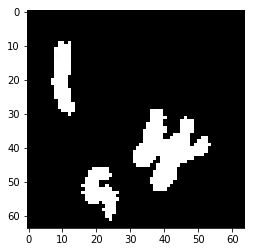

In [84]:
plt.imshow(img.reshape(64,64), cmap='Greys_r')

In [87]:
img[img!=0].min()

240.0

(10000, 10)


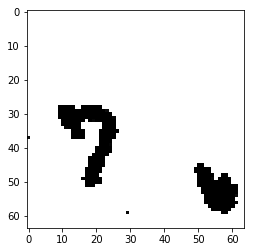

7


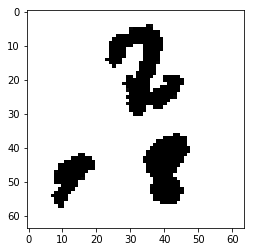

2


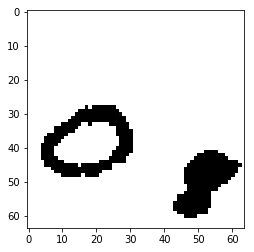

0


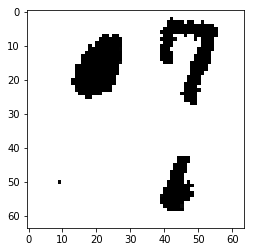

7


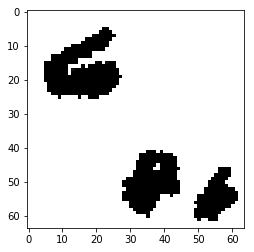

6


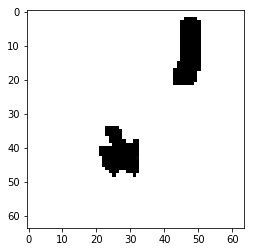

1


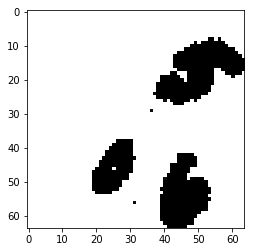

9


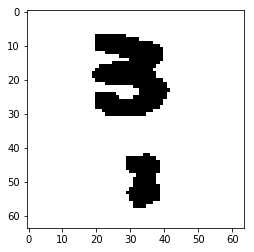

3


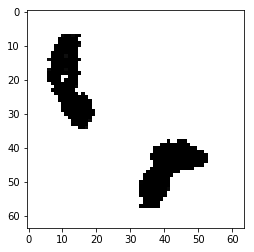

8


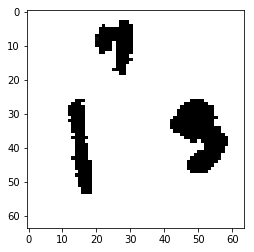

1


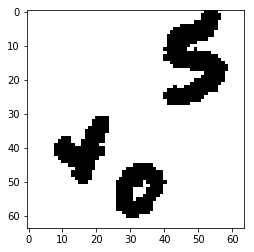

9


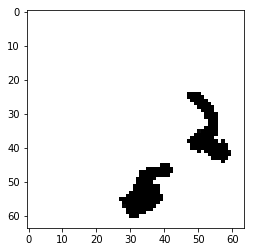

7


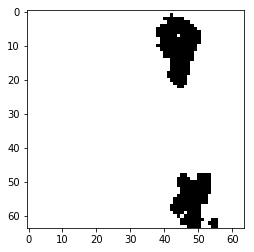

1


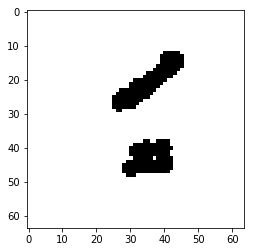

1


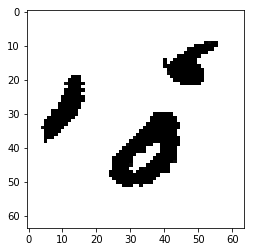

0


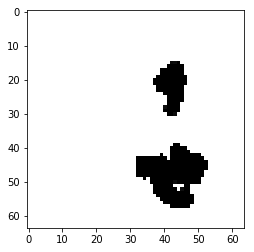

8


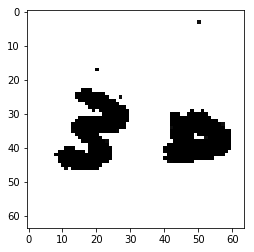

2


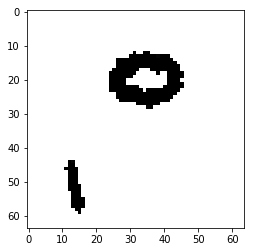

0


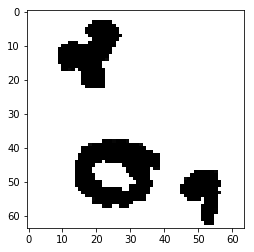

0


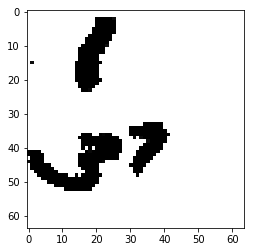

7


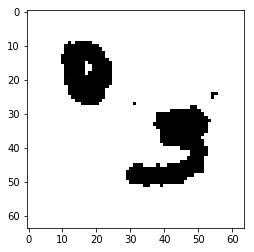

3


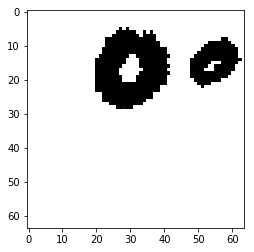

0


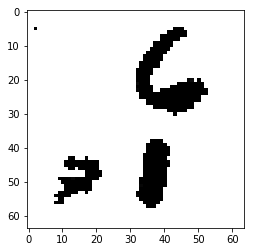

6


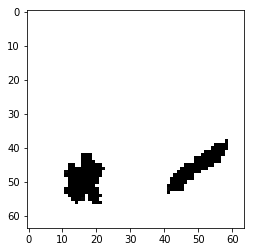

1


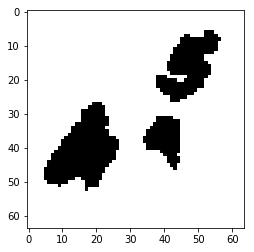

8


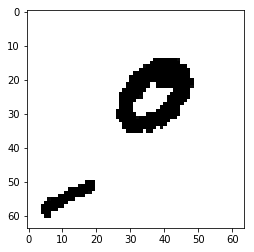

0


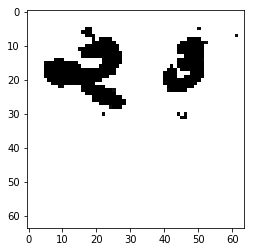

2


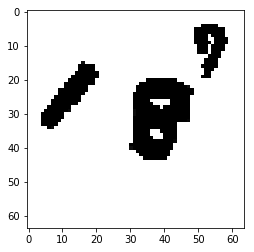

8


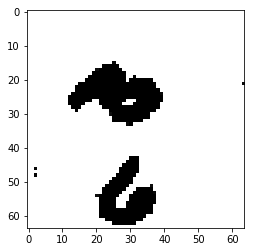

2


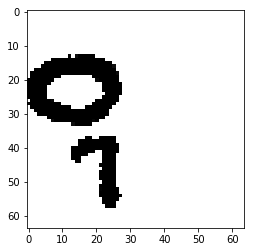

0


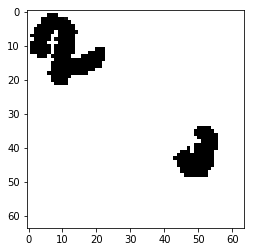

1


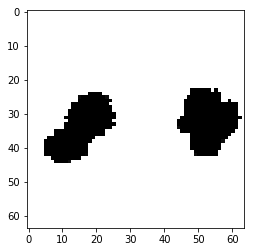

8


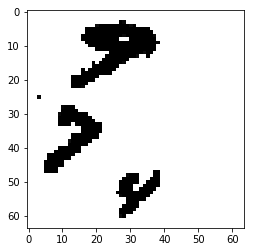

7


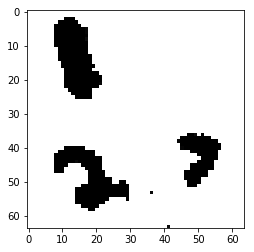

2


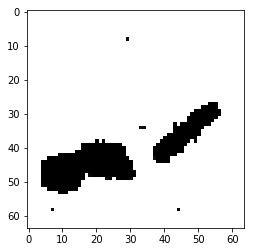

1


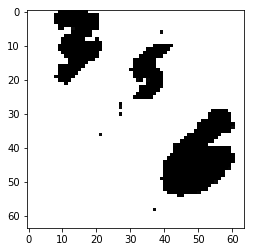

6


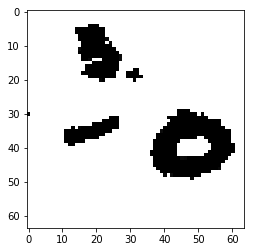

0


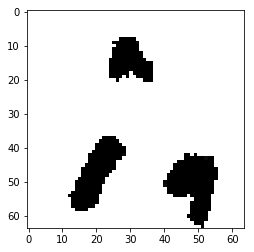

1


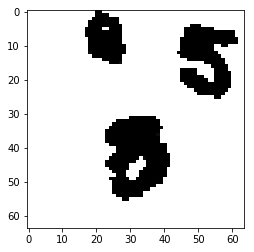

0


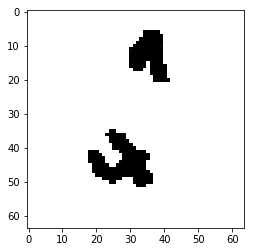

3


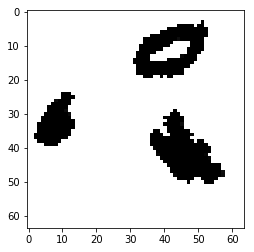

0


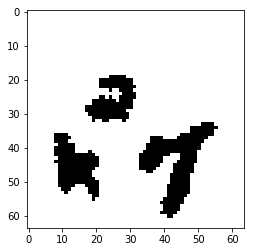

1


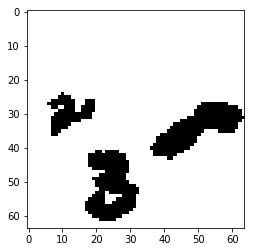

8


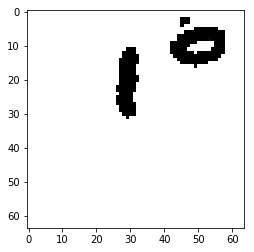

1


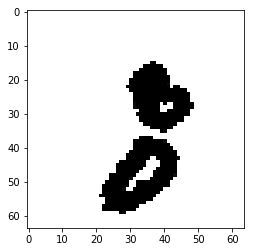

0


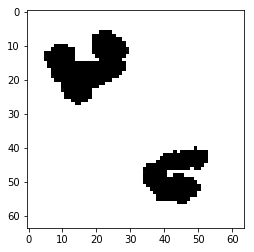

8


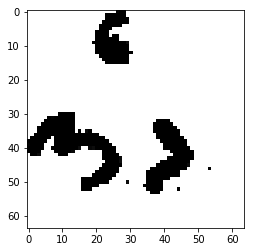

5


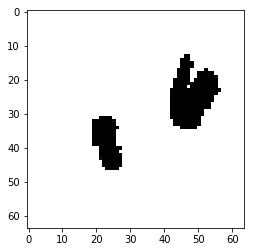

6


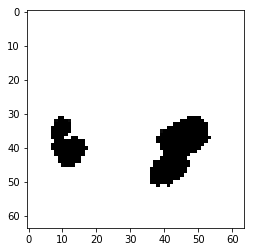

9


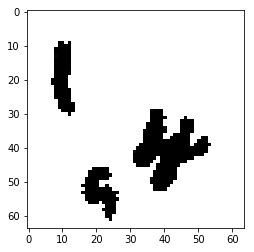

4


In [92]:
# this part shows a subset of test set and the prediction of the model. 
#Just to see how well the model performs
y_pred=model.predict(X2)
print y_pred.shape
y_pred=np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
for i in range(50):
    img= X_test[i].reshape(64, 64)
    img[img < 240] = 0
    plt.imshow(img, cmap=plt.get_cmap('binary'))
    plt.show()
    print y_pred[i]   

In [24]:
import pandas as pd
i=range(0,10000)
my_df = pd.DataFrame(zip(i,y_pred), columns = ["Id", "Label"])
my_df.to_csv('submission.csv', index=False, header=True)
